In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing data

In [2]:
PurchasePrice = pd.read_csv('/kaggle/input/inventory-analysis-case-study/2017PurchasePricesDec.csv')

In [3]:
BegInv = pd.read_csv('/kaggle/input/inventory-analysis-case-study/BegInvFINAL12312016.csv')

In [4]:
EndInv = pd.read_csv('/kaggle/input/inventory-analysis-case-study/EndInvFINAL12312016.csv')

In [5]:
Invoice = pd.read_csv('/kaggle/input/inventory-analysis-case-study/InvoicePurchases12312016.csv')

In [6]:
Final_Purchase = pd.read_csv('/kaggle/input/inventory-analysis-case-study/PurchasesFINAL12312016.csv')

In [7]:
Final_Sales = pd.read_csv('/kaggle/input/inventory-analysis-case-study/SalesFINAL12312016.csv')

# EDA

In [8]:
PurchasePrice.shape

(12261, 9)

In [9]:
PurchasePrice.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [10]:
PurchasePrice.isnull().sum()

# as we can see we have null values in columns:- descrition, Size, Volume.

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [11]:
# Checking the null value the null values
PurchasePrice[PurchasePrice['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [12]:
# Dropping the null values
PurchasePrice.dropna(inplace=True)


In [13]:
PurchasePrice.dtypes

Brand               int64
Description        object
Price             float64
Size               object
Volume             object
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object

In [14]:
PurchasePrice.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12260.000000,12260.000000,12260.000000,12260.000000,12260.000000
mean,17990.191680,38.643392,1.709054,26.489467,10815.704731
std,12528.395592,206.159284,0.454217,156.189257,19008.228360
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5991.500000,10.990000,1.000000,6.890000,3960.000000
50%,18789.000000,15.990000,2.000000,10.645000,7153.000000
75%,25117.250000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [15]:
BegInv.shape

(206529, 9)

In [16]:
BegInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [17]:
BegInv.isnull().sum()
# Here we have no null values

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [18]:
BegInv.dtypes

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object

In [19]:
BegInv.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [20]:
EndInv.shape

(224489, 9)

In [21]:
EndInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [22]:
EndInv.isnull().sum()
# Here we have null values in column "City"

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [23]:
EndInv[EndInv['City'].isnull()]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [24]:
EndInv.dropna(inplace=True)


In [25]:
Invoice.shape

(5543, 10)

In [26]:
Invoice.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None


In [27]:
Invoice.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

In [28]:
Final_Sales.shape

(1048575, 14)

In [29]:
Final_Sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [30]:
Final_Sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

# Univariate analysis

In [31]:
PurchasePrice.VendorName.value_counts()[0:5]

MARTIGNETTI COMPANIES          1631
ULTRA BEVERAGE COMPANY LLP      965
M S WALKER INC                  960
PERFECTA WINES                  897
E & J GALLO WINERY              527
Name: VendorName, dtype: int64

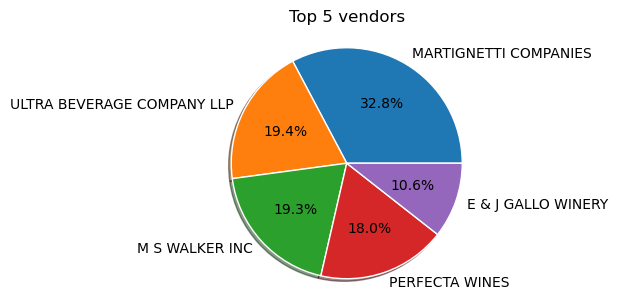

In [32]:
plt.figure(figsize=(3,3))

mylabels=["MARTIGNETTI COMPANIES","ULTRA BEVERAGE COMPANY LLP" ,'M S WALKER INC','PERFECTA WINES','E & J GALLO WINERY']


plt.pie(PurchasePrice.VendorName.value_counts()[0:5],labels=mylabels ,autopct='%0.1f%%',radius=1.25,
        wedgeprops={'edgecolor':'white'}
        ,textprops={'size':10,},shadow=True)

plt.title('Top 5 vendors\n')
plt.show()

# Bivariate Analysis


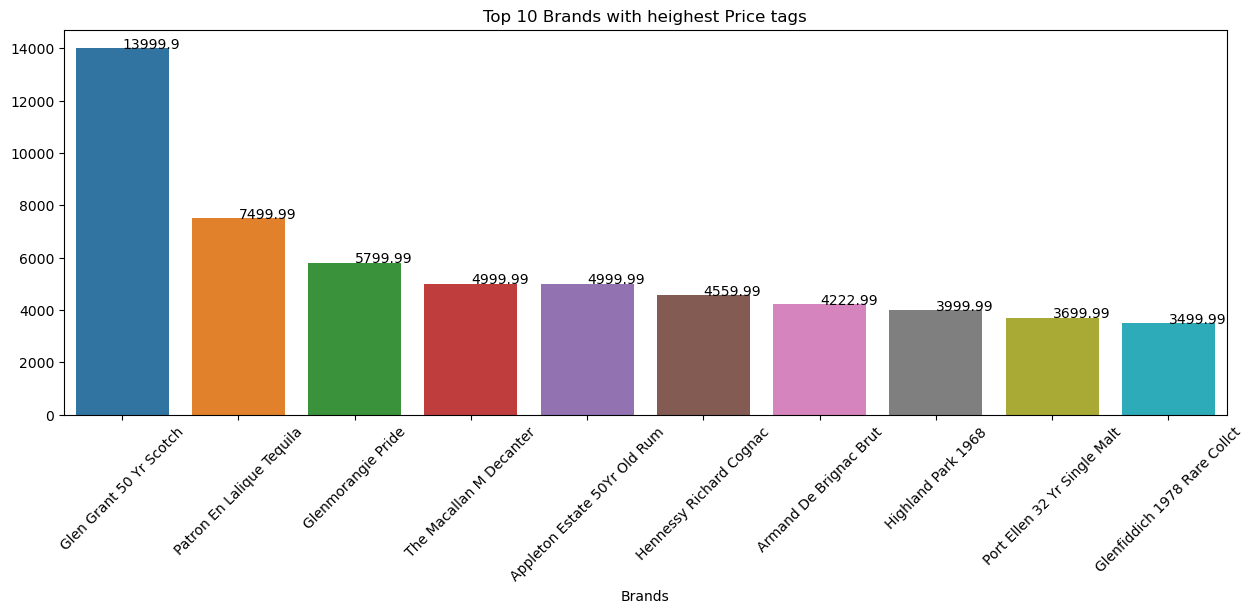

In [33]:
plt.figure(figsize=(15,5))
vc = PurchasePrice.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:10]

g = sns.barplot(x= vc.index , y = vc.values , data = PurchasePrice)

for i in range(10):
    value = vc[i]
    g.text(y = value -2, x= i+0.25, s= value, color='black', ha = 'center', fontsize= 10)

plt.title ('Top 10 Brands with heighest Price tags')
plt.xlabel('Brands')
plt.xticks(rotation= 45)
plt.show()    

# As we can see "Glan grant scotch" tops the list followed by "PEL Tequilla".

In [34]:
Invoice.head(1)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None


In [35]:
Invoice['Total Amount'] = Invoice['Dollars']+ Invoice['Freight']

In [36]:
Invoice.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Total Amount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None,149.12


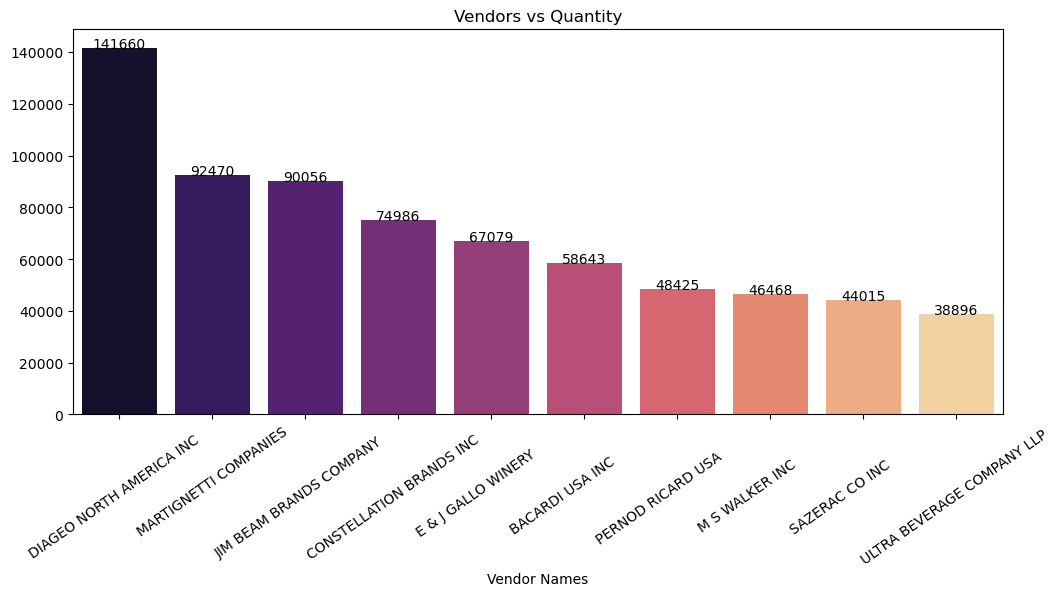

In [37]:
plt.figure(figsize=(12,5))

vc = Invoice.groupby(['VendorName'])['Quantity'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y= vc.values, data = Invoice, palette='magma')

for i in range(10):
    value = vc[i]
    g.text(y= value-2 , x= i, s= value, color='black', ha = 'center', fontsize =10)

plt.title('Vendors vs Quantity')
plt.xlabel('Vendor Names')
plt.xticks(rotation= 35)
plt.show()    

# Here, "Diago North America inc" purchased maximum quantities followed by "Martigentti companies".


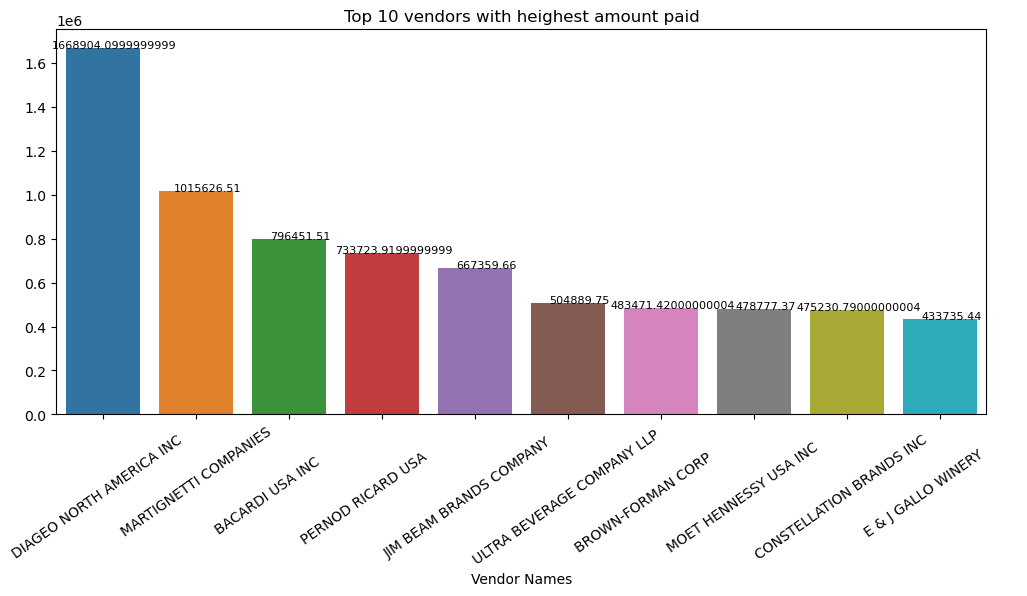

In [38]:
plt.figure(figsize=(12,5))
vc = Invoice.groupby(['VendorName'])['Total Amount'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x= vc.index , y= vc.values , data = Invoice)

for i in range(10):
    value = vc[i]
    g.text(y= value -2 , x= i+0.125, s= value, color = 'black', ha='center',fontsize=8)

plt.title('Top 10 vendors with heighest amount paid')
plt.xlabel('Vendor Names')
plt.xticks(rotation = 35)
plt.show()    
    
# "Diageo North America" tops the list followed by "Martignetti Companies"

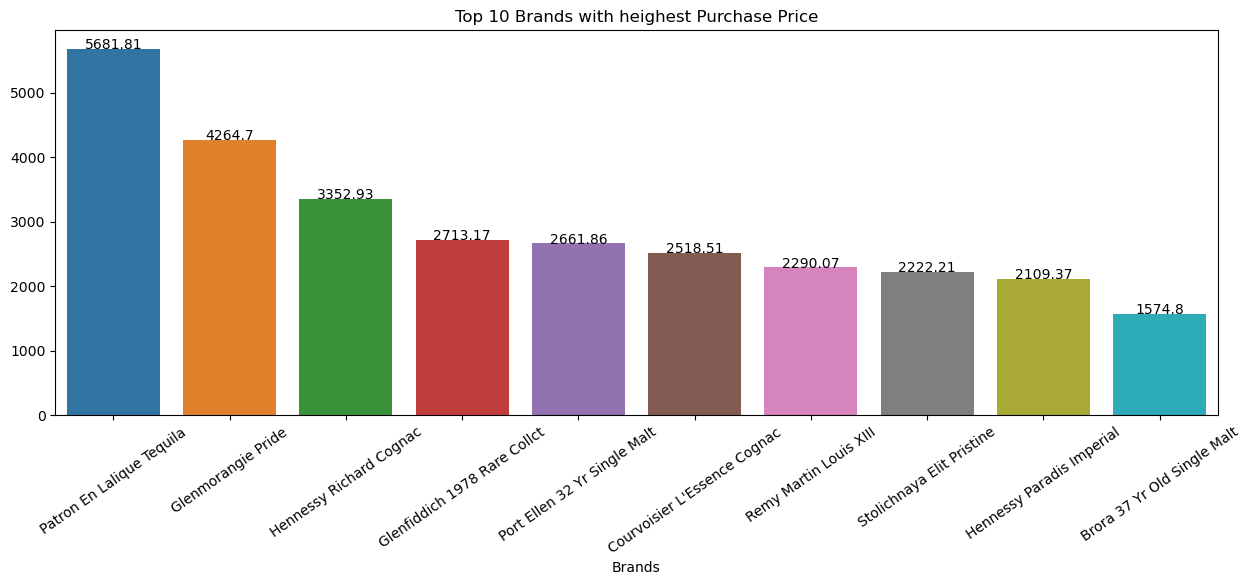

In [39]:
plt.figure(figsize=(15,5))
vc = Final_Purchase.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values , data = Final_Purchase)

for i in range(10):
    value = vc[i]
    g.text(x=i , y= value , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 Brands with heighest Purchase Price')
plt.xlabel('Brands')
plt.xticks(rotation=35)
plt.show()    

# "PEL Tequilla" has heighest Purchase Price followed by "G. Pride".

In [40]:
Final_Sales.head(2)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY


In [41]:
Final_Sales['Total Amount'] = Final_Sales['SalesDollars']+Final_Sales['ExciseTax']
Final_Sales.head(2)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Total Amount
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55


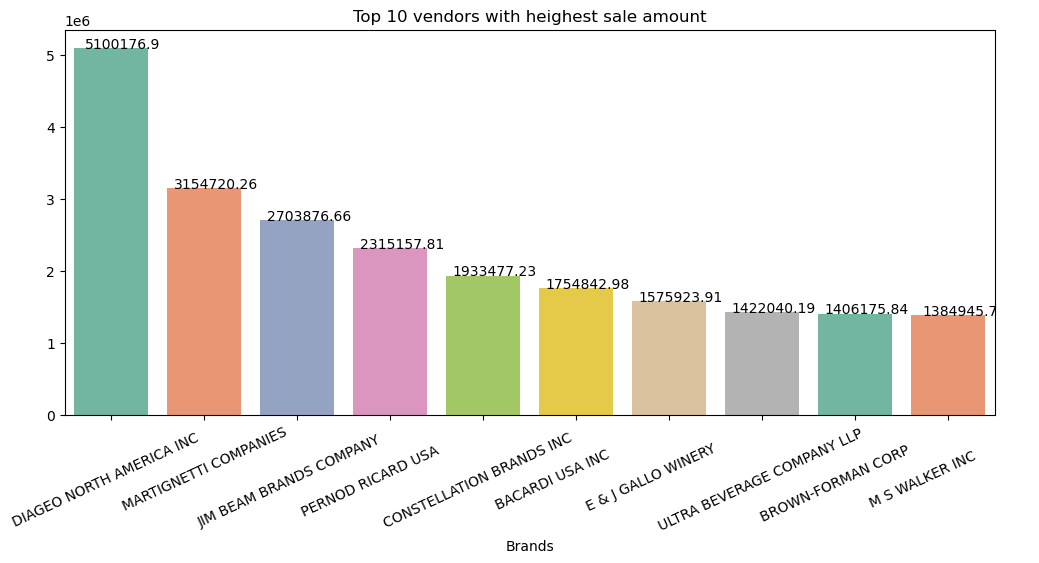

In [42]:
plt.figure(figsize=(12,5))
vc= Final_Sales.groupby(['VendorName'])['Total Amount'].sum().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = Final_Sales, palette="Set2")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 vendors with heighest sale amount')
plt.xlabel('Brands')
plt.xticks(rotation = 25)
plt.show()

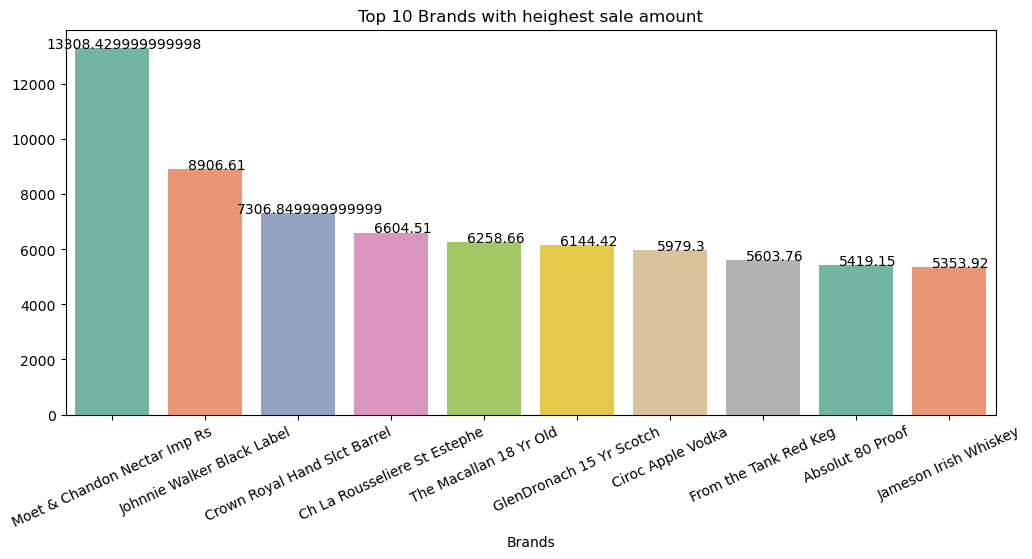

In [43]:
plt.figure(figsize=(12,5))
vc= Final_Sales.groupby(['Description'])['Total Amount'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = Final_Sales, palette="Set2")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 Brands with heighest sale amount')
plt.xlabel('Brands')
plt.xticks(rotation = 25)
plt.show()

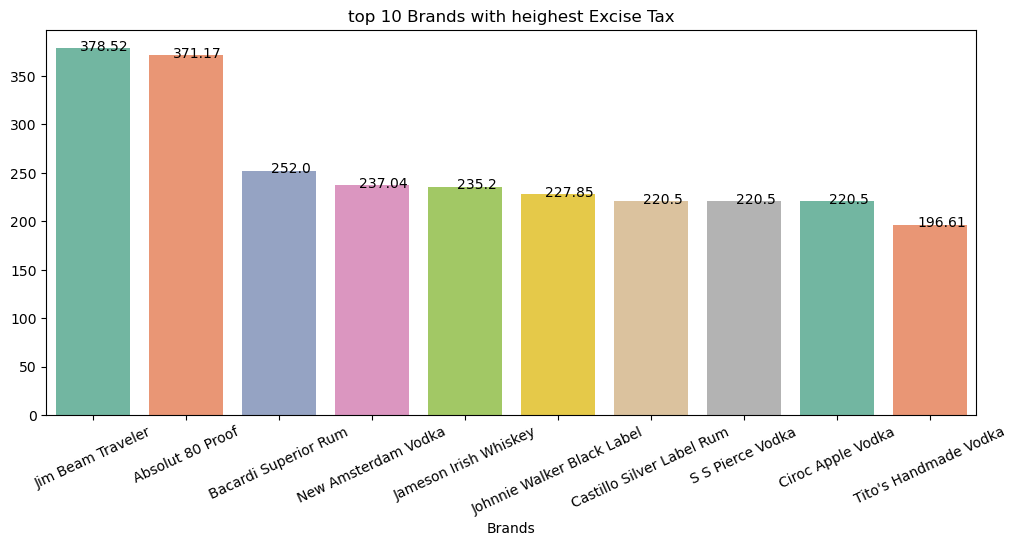

In [44]:
plt.figure(figsize=(12,5))
vc= Final_Sales.groupby(['Description'])['ExciseTax'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = Final_Sales, palette="Set2")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('top 10 Brands with heighest Excise Tax')
plt.xlabel('Brands')
plt.xticks(rotation = 25)
plt.show()

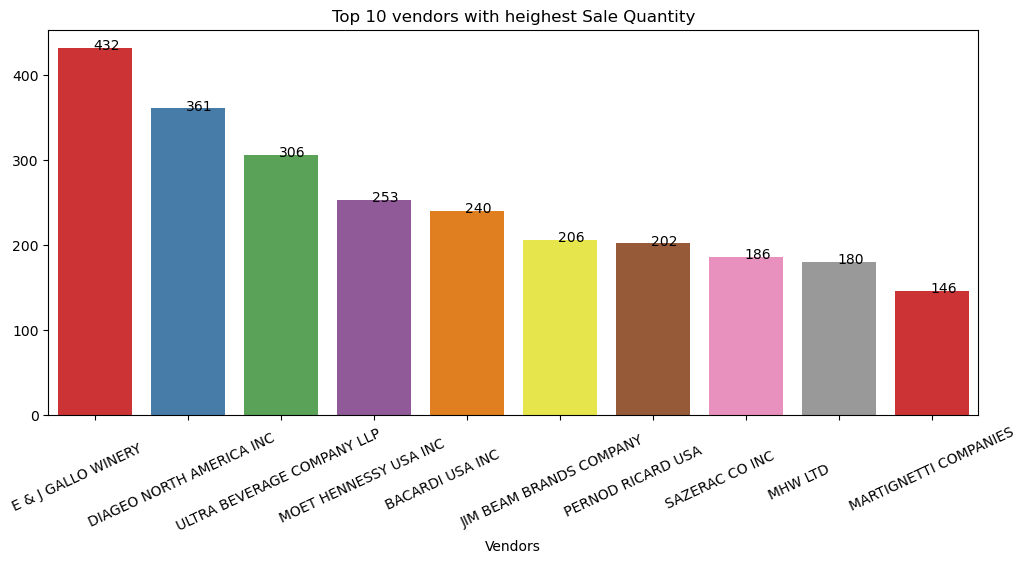

In [45]:
plt.figure(figsize=(12,5))
vc= Final_Sales.groupby(['VendorName'])['SalesQuantity'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = Final_Sales, palette="Set1")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 vendors with heighest Sale Quantity')
plt.xlabel('Vendors')
plt.xticks(rotation = 25)
plt.show()